**Nguyễn Phan Khánh Linh - Data Science**

**The Modeling Test is as follows:**

Use the data provided (MSN, PNJ, FPT, and VIC stock) to build some models to predict stock price fluctuations.


<div style="border: 1px solid black; padding: 10px;">
    <center>
        Stock price fluctuations = Stock Price N (minutes or hours or days) later - Current stock price.
    </center>
</div>


**My idea:** According to the problem, it is said to build some models to predict stock price fluctuations, where Stock price fluctuation = Stock price N (minutes or hours or days) later - Current stock price. 

Firstly, I thought I would create a model to directly predict stock price fluctuations, but when I started working, the model did not produce good results. And I came to a conclusion that directly predicting price fluctuations has the following problems: price fluctuations actually do not have the nature of a time series, they are just random variables. Although when looking at the price, the price tends to increase, but in terms of fluctuation, it is likely to decrease (just because its price increase is not as high as the previous day, but it is is still increasing). And a variable that we often see like stock price fluctuations is return, return is also considered random variables.

Secondly, if price fluctuation is a random variable, then we will use the main method of simulation (such as the monte carlo method). However, it is just a simulation of all possible future occurrences, but it is still not called prediction. So my proposal is to create a price prediction model, and from the prices we predict, I can infer my prediction of price fluctuations more accurately without having to simulate.

Finally, in this file, I use two main models relating Deep Learning: RNN and LSTM models. In particular, LSTM provides very good results for price prediction and price fluctuations through the results that I will present in detail below.

# 1. Neutral Network

<img src="C:\\Users\\ASUS\\Downloads\\NN.png" style="width: 400px;"/>

## 1.1 Gradient Descent Algorithm

Gradient Descent is a widely used optimization algorithm in neutral networks to adjust weights and other hyperparameters during training. In neutral networks, our goal is to minimize the loss function by adjusting the network weight.

**We have a function: $y = f(x)$**, we want to approximate the roots of the real-values functions:
- Step 1: Choose random initial value $x$.
- Step 2: Calculate gradient at $x$:  $\nabla f = f'(x)$
- Step 3: Update $x$ value in direction opposite to gradient: $x = x - f'(x)$.
- Step 4: If convergence is achieved, we should stop the process. If convergence has not been reached, we return to step 2 and continue iterating until convergence is achieved.

**Note that:** 
- When is it converged? The change in the loss between consecutive iterations falls below a certain threshold: $f_n(x) - f_{n-1}(x) < \text{threshold}$.
- If gradient $\nabla f$ is often too large.
  + Overshoot the minimum and fail to converge.
  + Optimization is not stable.
    
  Therefore, we will reduce gradient by using Learning Rate $\alpha$ (small positive number). The step 3 becomes that update $x$ value in direction opposite to gradient: $x = x - f'(x) \times \alpha,$ where $0 < \alpha < 1$.

**We have a function: $y= f(x_1, x_2, ..., x_n)$**. The gradient of multivariable functions:
$$\nabla f = \frac{\partial f}{\partial x} = \bigg( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3}, ..., \frac{\partial f}{\partial x_n} \bigg)$$.

## 1.2 Backpropagation algorithm

<img src="C:\\Users\\ASUS\\Downloads\\neutralnetwork.png" style="width: 500px;"/>

### 1.2.1 Notations

- $\ell = 1, 2, ..., L$: Network has $L$ layers from $1$ to $\ell$. Input layer is $1^{th}$ layer.
- $W^{(\ell)} = \begin{bmatrix}
    w_{11}^{(\ell)} &  w_{12}^{(\ell)} & w_{13}^{(\ell)}\\
    w_{21}^{(\ell)} &  w_{22}^{(\ell)} & w_{23}^{(\ell)}\\
\end{bmatrix}$ is the weights connecting nodes from the $(1-\ell)$ layer to the $(\ell)$ layer.
- $w_{jk}^{(\ell)}$ is weight connecting $k^{th}$ node of the $(\ell - 1)$ layer to $j^{th}$ node on the $(\ell)$ layer.
- $b^{(\ell)} = \begin{bmatrix} b_1^{\ell} \\ b_2^{\ell} \\ b_3^{\ell} \end{bmatrix}$ is bias connecting from the $(\ell -1)$ layer to the $(\ell)$ layer.
- For input layer: $a_i^{(1)}= x_i$.

**Weight input of the $j^{th}$ node of the $(\ell)$ layer:**
\begin{equation*}
    z_j^{(\ell)} = \sum_{k} w_{jk}^{(\ell)} \times a_{k}^{(\ell-1)} + b_j^{(\ell)}.
\end{equation*}
**Activation function of the $j^{th}$ node of the $(\ell)$ layer:**    
\begin{equation*}
    a_j^{(\ell)} = \sigma(z_j^{(\ell)}).
\end{equation*}    
Where, $\sigma(z) = \frac{1}{1+e^{-z}}$ is a sigmoid function.

**Cost function:**
\begin{equation*}
    C = \frac{1}{2n} \sum_x^n || y(x) - a^{L}(x) ||^2.
\end{equation*}
Where, 
- $n$: number of samples.
- $x$: input of individual sample $x = (x_1, x_2,...)$.
- $y$: output corresponding to input $x$.

For one input sample:
\begin{equation*}
    C = \frac{1}{2} || y - a^{(L)}||^2.
\end{equation*}

### 1.2.2 Solve the backpropagation algorithm

**Our goal is to find $w$ and $b$ that minimizes loss function $C$.** 

We need to find $\frac{\partial C }{\partial w_{jk}^{(\ell)}}$ and $\frac{\partial C}{\partial b_j^{(\ell)}}$.

Note: In backpropagation, all values $a_j^{(\ell)}$, $z_j^{(\ell)}$, and $y$ are available.

**Firstly,** find $\frac{\partial C}{\partial w_{jk}^{(\ell)}}$.

Using Chain Rule, we obtain:
\begin{equation*}
    \frac{\partial C}{\partial w_{jk}^{(\ell)}} = \frac{\partial C}{\partial z_j^{(\ell)}} \frac{\partial z_j^{(\ell)}}{\partial w_{jk}^{(\ell)}}.
\end{equation*}
Since,
\begin{equation*}
    z_j^{(\ell)} = \sum_{k} w_{jk}^{(\ell)} \times a_{k}^{(\ell-1)} + b_j^{(\ell)} = w_{j1}^{(\ell)}a_{1}^{(\ell-1)} + w_{j2}^{(\ell)}a_{2}^{(\ell-1)} + ...+ w_{jk}^{(\ell)}a_{k}^{(\ell-1)} + ... + b_j^{(\ell)}. 
\end{equation*}
Then,

\begin{equation}
    \frac{\partial z_j^{(\ell)}}{\partial w_{jk}^{(\ell)}} = a_k^{(\ell-1)} \implies \frac{\partial C}{\partial w_{jk}^{(\ell)}} = \frac{\partial C}{\partial z_j^{(\ell)}} a_{k}^{(\ell-1)}.
\end{equation}

**Secondly,** find $\frac{\partial C}{\partial b_j^{\ell}}$.

\begin{equation}
    \frac{\partial C}{\partial b_j^{(\ell)}} = \frac{\partial C}{\partial z_j^{(\ell)}}\frac{\partial z_j^{(\ell)}}{\partial b_j^{(\ell)}} = \frac{\partial C}{\partial z_j^{(\ell)}}.
\end{equation}
Since, 
\begin{equation}
    \frac{\partial z_j^{(\ell)}}{\partial b_j^{(\ell)}} = 1.
\end{equation}
We let $\delta_j^{(\ell)} = \frac{\partial C}{\partial z_j^{(\ell)}}$ . We call that is error of node $j$ in layer $\ell$. 

Then, 
\begin{equation*}
    \frac{\partial C}{\partial w_{jk}^{(\ell)}} = \delta_j^{(\ell)} a_k^{(\ell -1)} \text{ and } \frac{\partial C}{\partial b_j^{(\ell)}} =  \delta_j^{(\ell)}.
\end{equation*}

**All activations $a_k^{(\ell -1)}$ are available during feedforwards, what we need only $\delta_{j}^{(\ell)}$**.

For final output layer: 
\begin{equation*}
    \delta_j^{(\ell)} = \frac{\partial C}{\partial z_{j}^{(\ell)}} = \frac{\partial C}{\partial a_j^{(\ell)}}\frac{\partial a_j^{(\ell)}}{\partial z_j^{(\ell)}} = \frac{\partial C}{\partial a_j^{(\ell)}} \sigma'(z_j^{(\ell)}).
\end{equation*}
Since,
\begin{equation*}
    a_j^{(\ell)} = \sigma(z_j^{(\ell)}).
\end{equation*} 
We have,
\begin{equation*}
    \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma'(z) = \frac{e^{-z}}{(1+e^{-z})^2 }  \implies \sigma'(z_j^{(\ell)}) = \frac{e^{-z_j^{(\ell)}}}{(1+e^{-z_j^{(\ell)}})^2}.
\end{equation*}
and,
\begin{equation*}
    \frac{\partial C}{\partial a_j^{(\ell)}} = \frac{2}{2} (y-a_j^{(L)})(-1) = - (y-a_j^{(L)}) = a_j^{(L)} - y.
\end{equation*}
The problem for previous layers $\frac{\partial C}{\partial a_j^{(\ell-1)}}, \frac{\partial C}{\partial a_j^{(\ell-2)}}$,...
Because, we do not need direct relation between $C$ and $a_j^{(\ell-1)}$.

Finding, $\delta^{(\ell-1)} = f(\delta^{(\ell)})$. Therefore, we have formula:
\begin{equation*}
    \delta_j^{(\ell-1)} = \frac{\partial C}{\partial z_{j}^{(\ell-1)}} = \frac{\partial C}{\partial z_{1}^{(\ell)}}\frac{\partial z_{1}^{(\ell)}}{\partial z_{j}^{(\ell-1)}} + \frac{\partial C}{\partial z_{2}^{(\ell)}}\frac{\partial z_{2}^{(\ell)}}{\partial z_{j}^{(\ell-1)}} = \delta_1^{(\ell)}\frac{\partial z_{1}^{(\ell)}}{\partial z_{j}^{(\ell-1)}} + \delta_2^{(\ell)} \frac{\partial z_{2}^{(\ell)}}{\partial z_{j}^{(\ell-1)}}.
\end{equation*}
If the layer $l$ has $k$ nodes:
\begin{equation*}
    \delta_j^{(\ell-1)} = \sum_k \frac{\partial z_k^{(\ell)}}{\partial z_j^{(\ell-1)}} \delta_k^{(\ell)}.
\end{equation*}

We have: 
\begin{equation*}
    z_k^{(\ell)} = \sum_{j} w_{kj}^{(\ell)} \times a_{j}^{(\ell-1)} + b_k^{(\ell)} = \sum_{j} w_{kj}^{(\ell)} \times \sigma(z_j^{(\ell-1)}) + b_k^{(\ell)} \implies \frac{\partial z_k^{(\ell)}}{\partial z_j^{(\ell-1)}} = w_{kj}^{(\ell)} \sigma'(z_j^{(\ell-1)}).
\end{equation*}
So, 
\begin{equation}
    \delta_j^{(\ell-1)} = \sum_{k} w_{kj}^{(\ell)} \sigma'(z_j^{(\ell-1)}) \delta_k^{(\ell)} = \bigg[\sum_k w_{kj}^{(\ell)} \delta_{k}^{(\ell)}\bigg]\bigg[\sigma'(z_j^{(\ell-1)})\bigg].
\end{equation}
For the $\ell-1$ layer:
$$
\begin{bmatrix}
    \delta_1^{(\ell-1)} \\
    \delta_2^{(\ell-1)} \\
    \delta_3^{(\ell-1)} \\
\end{bmatrix} = \begin{bmatrix}
    \sum_k w_{k1}^{(\ell)} \delta_{k}^{(\ell)} \\
    \sum_k w_{k2}^{(\ell)} \delta_{k}^{(\ell)} \\
    \sum_k w_{k3}^{(\ell)} \delta_{k}^{(\ell)} \\
\end{bmatrix} \odot \begin{bmatrix}
    \sigma'(z_1^{(\ell-1)}) \\
    \sigma'(z_2^{(\ell-1)}) \\
    \sigma'(z_3^{(\ell-1)}) \\
\end{bmatrix}.
$$

Then, 
$$
\begin{bmatrix}
    \sum_k w_{k1}^{(\ell)} \delta_{k}^{(\ell)} \\
    \sum_k w_{k2}^{(\ell)} \delta_{k}^{(\ell)} \\
    \sum_k w_{k3}^{(\ell)} \delta_{k}^{(\ell)} \\ 
\end{bmatrix} = 
\begin{bmatrix}
    w_{11}^{(\ell)} \delta_{1}^{(\ell)} +  w_{21}^{(\ell)} \delta_{2}^{(\ell)}\\
    w_{12}^{(\ell)} \delta_{1}^{(\ell)} +  w_{22}^{(\ell)} \delta_{2}^{(\ell)}\\
    w_{13}^{(\ell)} \delta_{1}^{(\ell)} +  w_{23}^{(\ell)} \delta_{2}^{(\ell)}\\     
\end{bmatrix} = 
\begin{bmatrix}
    w_{11}^{(\ell)} &  w_{21}^{(\ell)}\\
    w_{12}^{(\ell)} &  w_{22}^{(\ell)}\\
    w_{13}^{(\ell)} &  w_{23}^{(\ell)}\\     
\end{bmatrix} 
\begin{bmatrix}
    \delta_{1}^{(\ell)}\\
    \delta_{2}^{(\ell)}\\    
\end{bmatrix}.
$$
We have, 
$$ W^{(\ell)} = 
\begin{bmatrix}
    w_{11}^{(\ell)} &  w_{12}^{(\ell)} & w_{13}^{(\ell)}\\
    w_{21}^{(\ell)} &  w_{22}^{(\ell)} & w_{23}^{(\ell)}\\
\end{bmatrix}.
$$
Therefore, 
$$ 
\begin{bmatrix}
    \delta^{(\ell-1)} = (W^{(\ell)})^T \delta^{(\ell)} \odot \sigma'(z^{(\ell-1)})
\end{bmatrix}.
$$

### 1.2.3 Step of backprobagation

<img src="C:\\Users\\ASUS\\Downloads\\backpropagation.png" style="width: 500px;"/>

After we obtain some fomula, the step to determine weight values: 

- Step 1: Choose random all $ W, b$ and $a^1 = x$
- Step 2: Find $z^{\ell} = w^{\ell} a^{\ell -1} + b^{\ell} \implies a^{\ell} = \sigma(z^{\ell})$ 
- Step 3: Find the final layer $\delta^{\ell}$ and find back $\delta^{l-1}$
- Step 4: Obtain $\frac{\partial C}{\partial w_{jk}^l} = \delta_j^{\ell} a_{k}^{\ell-1}$ and $\frac{\partial C}{\partial b_j^{\ell}} = \delta_j^{\ell}$
- Step 5: Update $W, b$ using gradient descent and go back to Step 1 until the roots is converged.

After use all data samples, we can determine all the weight $w_{jk}^{(\ell)}$ that define the neural network model which best fits all the data and minimizes the error.


## 1.3 Recurrent Neutral Network (RNN)

<img src="C:\\Users\\ASUS\\Downloads\\RNN.png" style="width: 500px;"/>

Recurrent Neural Network remembers the past and its decisions are influenced by what it has learned from the past. 

**Vanishing or exploding gradients**

<img src="C:\\Users\\ASUS\\Downloads\\goodRNN.png" style="width: 400px;"/>

We have:
\begin{equation}
    \delta_j^{(\ell-1)} = \sum_{k} w_{kj}^{(\ell)} \sigma'(z_j^{(\ell-1)}) \delta_k^{(\ell)} = \bigg[\sum_k w_{kj}^{(\ell)} \delta_{k}^{(\ell)}\bigg]\bigg[\sigma'(z_j^{(\ell-1)})\bigg]
\end{equation}

We observe $w_{kj}^{(\ell)} \sigma'(z_j^{(\ell-1)}) \delta_k^{(\ell)}$, which essentially adds matrix multiplication over the (perhaps very lengthy) sequence; if there are tiny values (< 1) in the matrix multiplication, this results in the gradient getting smaller with each layer (or time step), until it eventually disappears. In essence, this halts the current time step’s contribution from states that occurred much earlier in time. Similarly, this may occur in the reverse way if we multiply a matrix with big values (> 1), which results in an explosive gradient that overvalues each weight and significantly alters it. To specifically address the vanishing gradient problem, this issue led to the development of long short term memory units (LSTMs).

<img src="C:\\Users\\ASUS\\Downloads\\badRNN.png" style="width: 400px;"/>

## 1.4 Long Short Term Memory (LSTM)

<img src="C:\\Users\\ASUS\\Downloads\\LSTM.png" alt="LSTM" style="width: 500px;"/>

LSTM is an improved version of the regular RNN which was designed to make it easy to capture long-term dependencies in sequence data. 

**Why sigmoid?**
Sigmoid can output 0 to 1, it can be used to forget or remember the information

**Why tanh?**
To overcome the vanishing gradient problem. Tanh's  second derivative can sustain for a long range before going to zero

**Forget gate:** How much of the past to forget.

<img src="C:\\Users\\ASUS\\Downloads\\forgetgate.png" style="width: 500px;"/>

Outputs a number between 0 and 1 for each number in the cell state. 0 to completely forget and 1 to keep all information.

**Input gate:** What new information will be stored in the cell state 

<img src="C:\\Users\\ASUS\\Downloads\\inputgate.png" style="width: 500px;"/>

Sigmoid layer decides which values are updated and Tanh layer gives weights to the values to be added to the state.

**Output gate:** Decide what part of current cell makes to the output

<img src="C:\\Users\\ASUS\\Downloads\\outputgate.png" style="width: 500px;"/>

Sigmoid layer decides which part of cell state is selected for output.

# 2. Application and results

I create 2 model that are RNN and LSTM 

In [55]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from keras.layers import LSTM
from PIL import Image
import itertools
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [65]:
files = ["MSN.csv", "PNJ.csv", "FPT.csv", "VIC.csv"]
variables = ["MSN", "PNJ", "FPT", "VIC"]

for file, var in zip(files, variables):
    globals()[var] = pd.read_csv(file)

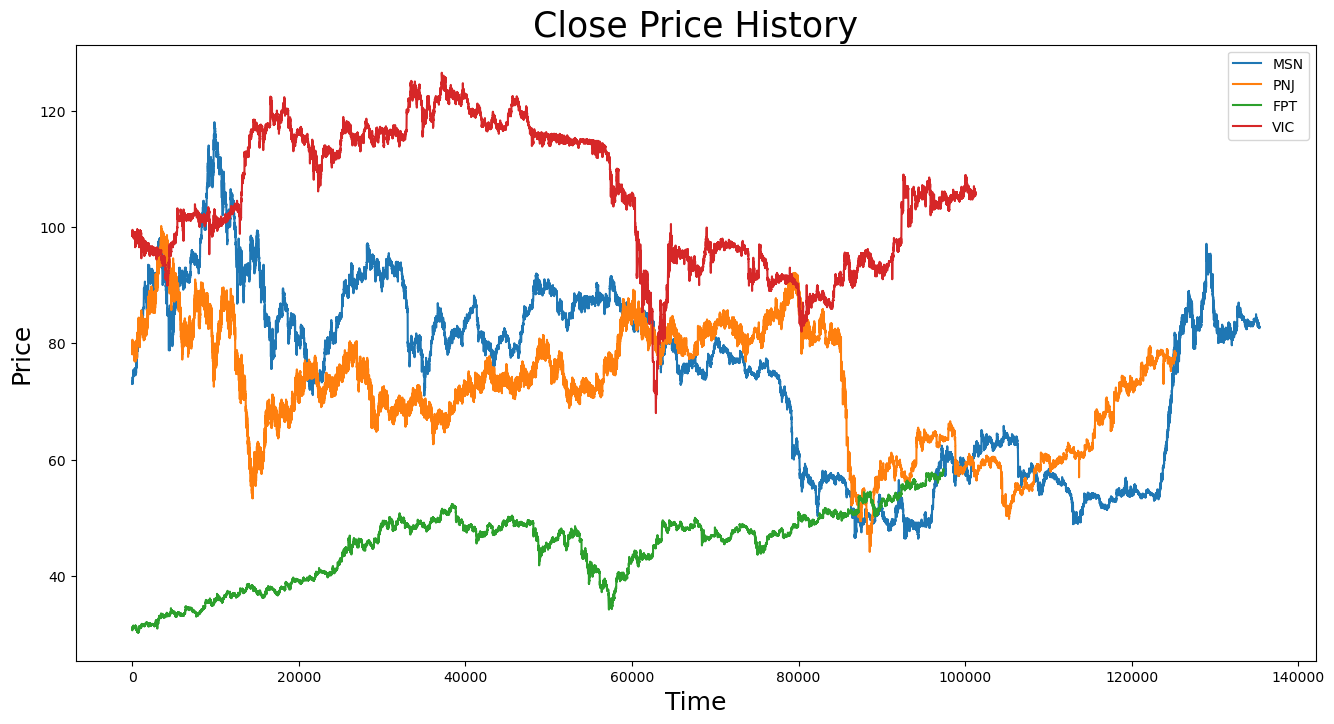

In [3]:
plt.figure(figsize = (16,8))
plt.title("Close Price History", fontsize = 25)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
for var in variables:
    plt.plot(globals()[var]["Close"], label = var)
plt.legend()
plt.show()

In [66]:
for var in variables:
    globals()[var] = globals()[var]["Close"]

## Step 1: Spliting the data into Train and Test

We split the dataset into training and testing in the ratio 80:20.

In [5]:
for var in variables:
    # Setting 80 percent data for training
    globals()[var + "_training_data_len"] = math.ceil(len(globals()[var])*0.8)
    print(f"{var} train size: {globals()[var + '_training_data_len']}")

    # Splitting the dataset
    globals()[var + "_train_data"] = globals()[var].loc[:globals()[var + '_training_data_len']]
    globals()[var + "_test_data"] = globals()[var].loc[globals()[var + '_training_data_len'] :]
    print(f"{var} train size: {globals()[var + '_train_data'].shape}")

MSN train size: 108284
MSN train size: (108285,)
PNJ train size: 100248
PNJ train size: (100249,)
FPT train size: 77925
FPT train size: (77926,)
VIC train size: 81013
VIC train size: (81014,)


In [116]:
for var in variables:
    globals()[var + "_training_data_len"] = math.ceil(len(globals()[var])*0.8)
    globals()[var + "_test_data_no_scaled"] = globals()[var].loc[globals()[var + '_training_data_len'] + 50:]
    globals()[var + "_y_test_no_scaled"] = np.reshape(globals()[var + '_test_data_no_scaled'], (globals()[var + '_test_data_no_scaled'].shape[0], 1))

In [6]:
for var in variables:
    # Reshaping 1D to 2D array
    globals()[var + "_dataset_train"] = np.reshape(globals()[var + '_train_data'], (-1,1))
    globals()[var + "_dataset_test"] = np.reshape(globals()[var + '_test_data'], (-1,1))
    print(f"{var} train shape: {globals()[var + '_dataset_train'].shape}")
    print(f"{var} test shape: {globals()[var + '_dataset_test'].shape}")
    print()

MSN train shape: (108285, 1)
MSN test shape: (27070, 1)

PNJ train shape: (100249, 1)
PNJ test shape: (25061, 1)

FPT train shape: (77926, 1)
FPT test shape: (19481, 1)

VIC train shape: (81014, 1)
VIC test shape: (20253, 1)



The 1-dimensional array is then transformed into a 2-dimensional array (num_rows, num_columns).

## Step 2: Scaling the data 

Normalization is a crucial step in data preprocessing to enhance the effectiveness and interpretability of machine learning models. 

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
for var in variables:
    globals()[var + "_scaled_train"] = scaler.fit_transform(globals()[var + '_dataset_train'])
    globals()[var + "_scaled_test"] = scaler.fit_transform(globals()[var + '_dataset_test'])
    print(f"{var} scaled train: {globals()[var + '_scaled_train'][:3]}")
    print(f"{var} scaled test: {globals()[var + '_scaled_test'][:3]}")

MSN scaled train: [[0.37290503]
 [0.37150838]
 [0.37849162]]
MSN scaled test: [[0.18879668]
 [0.18879668]
 [0.18672199]]
PNJ scaled train: [[0.62209925]
 [0.62120671]
 [0.6069261 ]]
PNJ scaled test: [[0.30976431]
 [0.31313131]
 [0.32659933]]
FPT scaled train: [[0.02898551]
 [0.02536232]
 [0.02219203]]
FPT scaled test: [[0.13445378]
 [0.13445378]
 [0.13445378]]
VIC scaled train: [[0.52136752]
 [0.52136752]
 [0.52307692]]
VIC scaled test: [[0.075]
 [0.075]
 [0.075]]


## Step 3: Creating a set Train and Test

The loop generates input/output sequences of length 50 while iterating through the time series data.

In [8]:
for var in variables:
    globals()[var + "_X_train"] = []
    globals()[var + "_y_train"] = []
    for i in range(50, len(globals()[var + "_scaled_train"])):
        globals()[var + "_X_train"].append(globals()[var + "_scaled_train"][i-50: i, 0])
        globals()[var + "_y_train"].append(globals()[var + "_scaled_train"][i,0])
        if i <= 51:
            print(f"{var} train: {globals()[var + '_X_train']}")
            print(f"{var} test: {globals()[var + '_y_train']}")
            print()

MSN train: [array([0.37290503, 0.37150838, 0.37849162, 0.37290503, 0.37150838,
       0.37290503, 0.37290503, 0.37569832, 0.37849162, 0.37569832,
       0.37290503, 0.37290503, 0.37290503, 0.37569832, 0.37569832,
       0.37569832, 0.37430168, 0.37569832, 0.37569832, 0.37430168,
       0.37290503, 0.37430168, 0.37290503, 0.37150838, 0.37150838,
       0.37150838, 0.37150838, 0.37290503, 0.37150838, 0.37150838,
       0.37290503, 0.37290503, 0.37290503, 0.37430168, 0.37569832,
       0.37569832, 0.37849162, 0.38268156, 0.38268156, 0.38547486,
       0.38547486, 0.38547486, 0.38547486, 0.38826816, 0.38547486,
       0.38547486, 0.38547486, 0.38547486, 0.38547486, 0.38826816])]
MSN test: [0.3868715083798884]

MSN train: [array([0.37290503, 0.37150838, 0.37849162, 0.37290503, 0.37150838,
       0.37290503, 0.37290503, 0.37569832, 0.37849162, 0.37569832,
       0.37290503, 0.37290503, 0.37290503, 0.37569832, 0.37569832,
       0.37569832, 0.37430168, 0.37569832, 0.37569832, 0.37430168,
    

In [9]:
for var in variables:
    globals()[var + "_X_test"] = []
    globals()[var + "_y_test"] = []
    for i in range(50, len(globals()[var + '_scaled_test'])):
        globals()[var + "_X_test"].append(globals()[var + '_scaled_test'][i - 50 : i, 0])
        globals()[var + "_y_test"].append(globals()[var + '_scaled_test'][i, 0])
        

## Step 4: Reshape the data

 In this step, the data is converted into a format that is suitable for input to an RNN.

 X_train array, which was originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features).

 The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1).

In [10]:
for var in variables:
    # The data is converted to Numpy array
    globals()[var + "_X_train"], globals()[var + "_y_train"] = np.array(globals()[var + "_X_train"]), np.array(globals()[var + "_y_train"])
    # Reshaping
    globals()[var + "_X_train"] = np.reshape(globals()[var + "_X_train"], (globals()[var + "_X_train"].shape[0], globals()[var + "_X_train"].shape[1], 1))
    globals()[var + "_y_train"] = np.reshape(globals()[var + "_y_train"], (globals()[var + "_y_train"].shape[0], 1))
    print(f"{var}: {globals()[var + '_X_train'].shape} and {globals()[var + '_y_train'].shape}")
    

MSN: (108235, 50, 1) and (108235, 1)
PNJ: (100199, 50, 1) and (100199, 1)
FPT: (77876, 50, 1) and (77876, 1)
VIC: (80964, 50, 1) and (80964, 1)


In [11]:
for var in variables:
    # The data is converted to Numpy array
    globals()[var + "_X_test"], globals()[var + "_y_test"] = np.array(globals()[var + "_X_test"]), np.array(globals()[var + "_y_test"])
    # Reshaping
    globals()[var + "_X_test"] = np.reshape(globals()[var + "_X_test"], (globals()[var + "_X_test"].shape[0], globals()[var + "_X_test"].shape[1], 1))
    globals()[var + "_y_test"] = np.reshape(globals()[var + "_y_test"], (globals()[var + "_y_test"].shape[0], 1))
    print(f"{var}: {globals()[var + '_X_test'].shape} and {globals()[var + '_y_test'].shape}")
    

MSN: (27020, 50, 1) and (27020, 1)
PNJ: (25011, 50, 1) and (25011, 1)
FPT: (19431, 50, 1) and (19431, 1)
VIC: (20203, 50, 1) and (20203, 1)


## Step 5: Building the Model

**Simple RNN model:**

- I creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. 
- It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced.  
- It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. 

In [13]:
# initializing the input_shape=(globals()[var + '_X_train'].shape[1], 1)
for var in variables:
    globals()[var + "_regressor"] = Sequential()
    # adding RNN layers and dropout regularization
    globals()[var + "_regressor"].add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape=(globals()[var + '_X_train'].shape[1], 1)))
    globals()[var + "_regressor"].add(Dropout(0.2))

    globals()[var + "_regressor"].add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))    
    globals()[var + "_regressor"].add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
    globals()[var + "_regressor"].add(SimpleRNN(units = 50))

    # adding the output layer
    globals()[var + "_regressor"].add(Dense(units = 1, activation = 'sigmoid'))

    # compiling RNN
    globals()[var + "_regressor"].compile(optimizer = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True), loss = "mean_squared_error")

**LSTM RNN Model:**
- I create a LSTM Model with three layers and a dense output layer. 
- It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. 

In [14]:
for var in variables:
    # Initialising the model
    globals()[var + "_regressorLSTM"] = Sequential()
    
    globals()[var + "_regressorLSTM"].add(LSTM(50, return_sequences = True, input_shape = (globals()[var + "_X_train"].shape[1],1)))    
    globals()[var + "_regressorLSTM"].add(LSTM(50, return_sequences = True, input_shape = (globals()[var + "_X_train"].shape[1],1)))
    globals()[var + "_regressorLSTM"].add(LSTM(50, return_sequences = False))

    # Adding the output layer
    globals()[var + "_regressorLSTM"].add(Dense(1))

    # Compiling the model
    globals()[var + "_regressorLSTM"].compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["accuracy"])

## Step 6: Fitting the Model

In [15]:
for var in variables:
    globals()[var + "_regressor"].fit(globals()[var + '_X_train'], globals()[var + '_y_train'], epochs = 1, batch_size = 1)  

108235/108235 ━━━━━━━━━━━━━━━━━━━━ 3660s 34ms/step - loss: 3.3636e-04
100199/100199 ━━━━━━━━━━━━━━━━━━━━ 2445s 24ms/step - loss: 0.0030
77876/77876 ━━━━━━━━━━━━━━━━━━━━ 1475s 19ms/step - loss: 0.0726
80964/80964 ━━━━━━━━━━━━━━━━━━━━ 1481s 18ms/step - loss: 0.0023


In [16]:
for var in variables:
    # Fit the model
    globals()[var + "_regressorLSTM"].fit(globals()[var + '_X_train'], globals()[var + '_y_train'], epochs = 1, batch_size = 1)

108235/108235 ━━━━━━━━━━━━━━━━━━━━ 1930s 18ms/step - accuracy: 8.4963e-06 - loss: 1.9915e-04
100199/100199 ━━━━━━━━━━━━━━━━━━━━ 1780s 18ms/step - accuracy: 1.5309e-05 - loss: 5.9460e-04
77876/77876 ━━━━━━━━━━━━━━━━━━━━ 1446s 18ms/step - accuracy: 1.3396e-04 - loss: 4.6661e-04
80964/80964 ━━━━━━━━━━━━━━━━━━━━ 1689s 21ms/step - accuracy: 2.7839e-05 - loss: 3.1001e-04


The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [19]:
for var in variables:
    print(f"{var} RNN summary:")
    print(globals()[var + "_regressor"].summary())
    print()

MSN RNN summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

None

PNJ RNN summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_16 (SimpleRNN)            │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_17 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_18 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

None

FPT RNN summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)            │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_22 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_23 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

None

VIC RNN summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_24 (SimpleRNN)            │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_25 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_26 (SimpleRNN)            │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_27 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

None



In [20]:
for var in variables:
    print(f"{var} LSTM summary:")
    print(globals()[var + "_regressorLSTM"].summary())
    print()

MSN LSTM summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

None

PNJ LSTM summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

None

FPT LSTM summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

None

VIC LSTM summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

None



## Step 7: Predicting the Model

In [21]:
for var in variables:
    # predictions with X_test data
    globals()[var + "_y_RNN"] = globals()[var + "_regressor"].predict(globals()[var + "_X_test"])
    globals()[var + "_y_LSTM"] = globals()[var + "_regressorLSTM"].predict(globals()[var + "_X_test"])

845/845 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step
845/845 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step
608/608 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
608/608 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step


The predicted values are transformed back from the normalized state to their original scale.

In [32]:
for var in variables:
    # scaling back from 0-1 to original
    globals()[var + "_y_RNN_original"] = scaler.inverse_transform(globals()[var + "_y_RNN"])    
    globals()[var + "_y_LSTM_original"] = scaler.inverse_transform(globals()[var + "_y_LSTM"])

In [89]:
for var in variables:
    print(f"{var} predict using RNN and real value:")
    for pred_RNN, true_value in itertools.islice(zip(globals()[var + "_y_RNN_original"], globals()[var + '_test_data_no_scaled']), 3):
        print(f"RNN: {pred_RNN}, Real: {true_value}")
    print(f"{var} predict using LSTM and real value:")
    for pred_LSTM, true_value in itertools.islice(zip(globals()[var + "_y_LSTM_original"], globals()[var + '_test_data_no_scaled']), 3):
        print(f"LSTM: {pred_LSTM}, Real: {true_value}")
    print() 

MSN predict using RNN and real value:
RNN: [88.71017], Real: 58.2
RNN: [88.69923], Real: 58.2
RNN: [88.68834], Real: 58.2
MSN predict using LSTM and real value:
LSTM: [88.84804], Real: 58.2
LSTM: [88.865654], Real: 58.2
LSTM: [88.864716], Real: 58.2

PNJ predict using RNN and real value:
RNN: [92.431564], Real: 58.9
RNN: [92.52668], Real: 59.0
RNN: [92.65655], Real: 58.9
PNJ predict using LSTM and real value:
LSTM: [92.70326], Real: 58.9
LSTM: [92.66912], Real: 59.0
LSTM: [92.61842], Real: 58.9

FPT predict using RNN and real value:
RNN: [102.68883], Real: 47.8
RNN: [102.68883], Real: 47.8
RNN: [102.68883], Real: 47.8
FPT predict using LSTM and real value:
LSTM: [88.02785], Real: 47.8
LSTM: [88.02614], Real: 47.8
LSTM: [88.02519], Real: 47.8

VIC predict using RNN and real value:
RNN: [86.759544], Real: 84.0
RNN: [86.77051], Real: 84.0
RNN: [86.78834], Real: 83.9
VIC predict using LSTM and real value:
LSTM: [87.596], Real: 84.0
LSTM: [87.76231], Real: 84.0
LSTM: [87.38025], Real: 83.9


## Step 8: Evaluating the Model

Visualize the predicted prices.

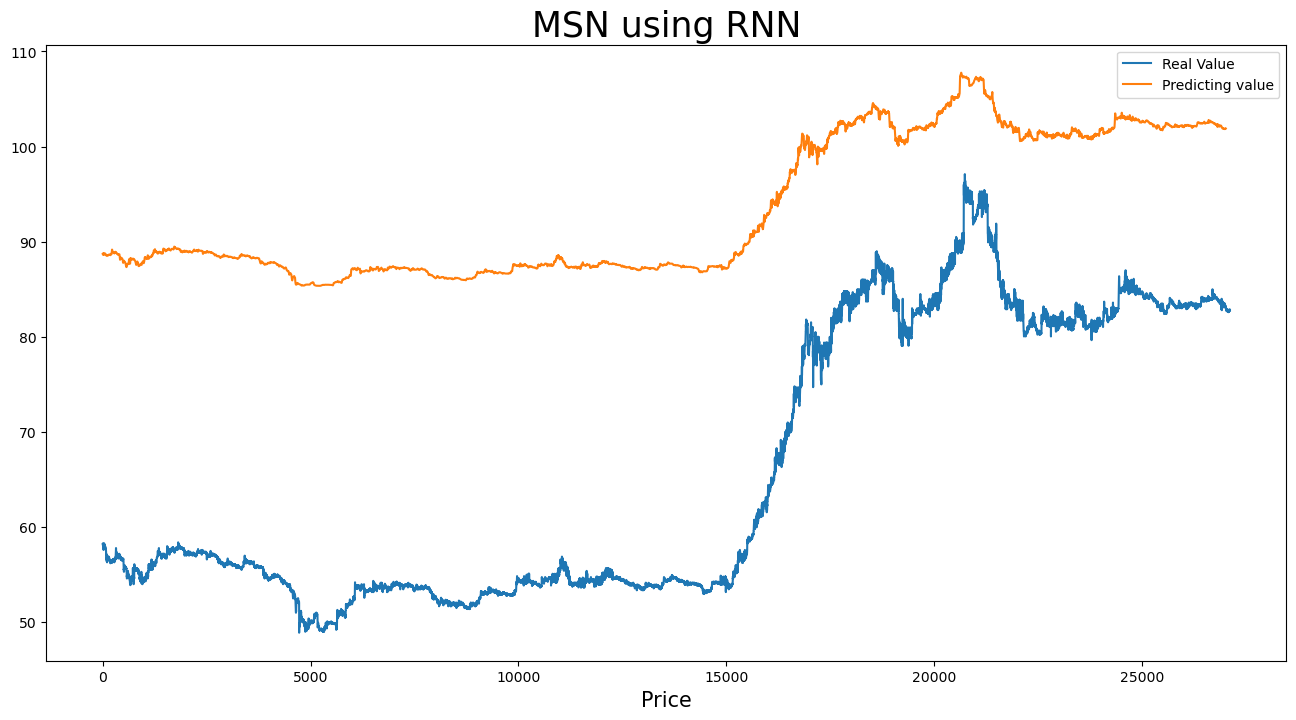

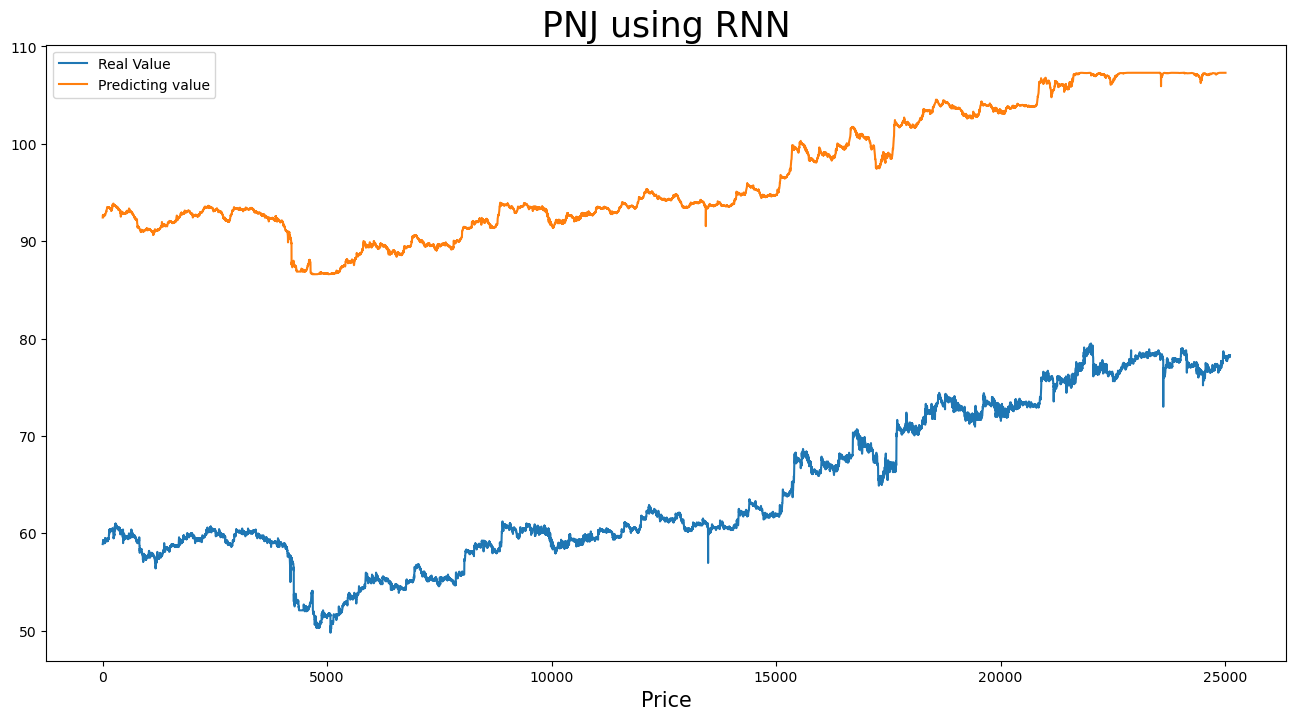

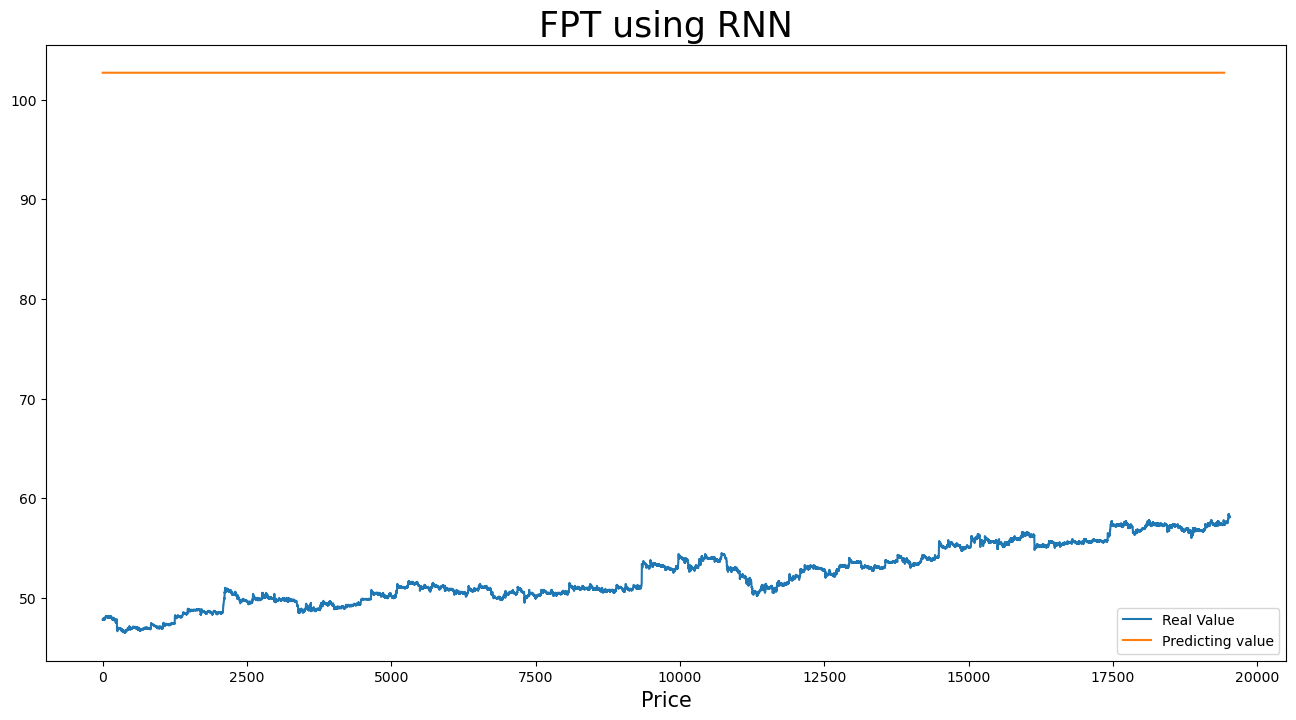

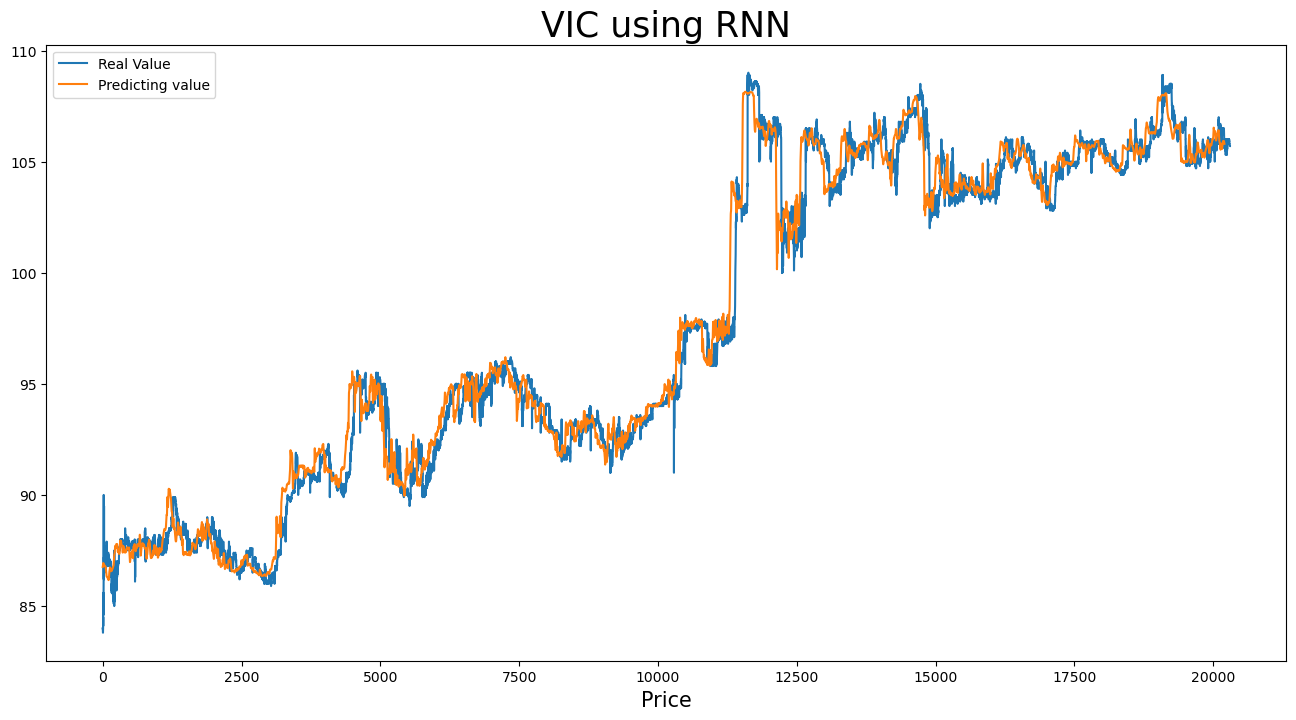

In [87]:
for var in variables:
    plt.figure(figsize=(16, 8))
    y_test_no_scaled = globals()[var + '_y_test_no_scaled']
    y_RNN_original = globals()[var + "_y_RNN_original"].reshape(-1)  # Reshape to match dimensions
    plt.plot(np.arange(len(y_test_no_scaled)), y_test_no_scaled, label="Real Value")
    plt.plot(np.arange(len(y_RNN_original)), y_RNN_original, label="Predicting value")
    plt.title(f"{var} using RNN", fontsize = 25)
    plt.xlabel("Time", fontsize = 15)
    plt.xlabel("Price", fontsize = 15)
    plt.legend()
    plt.show()

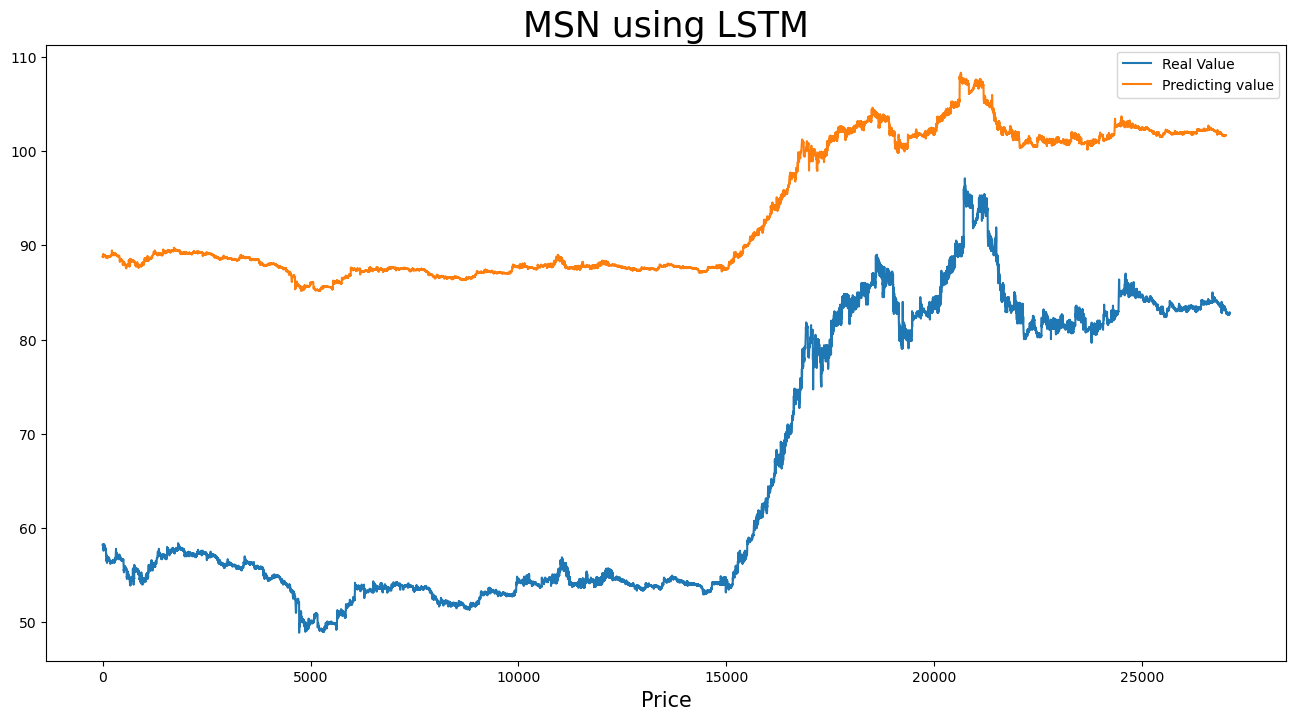

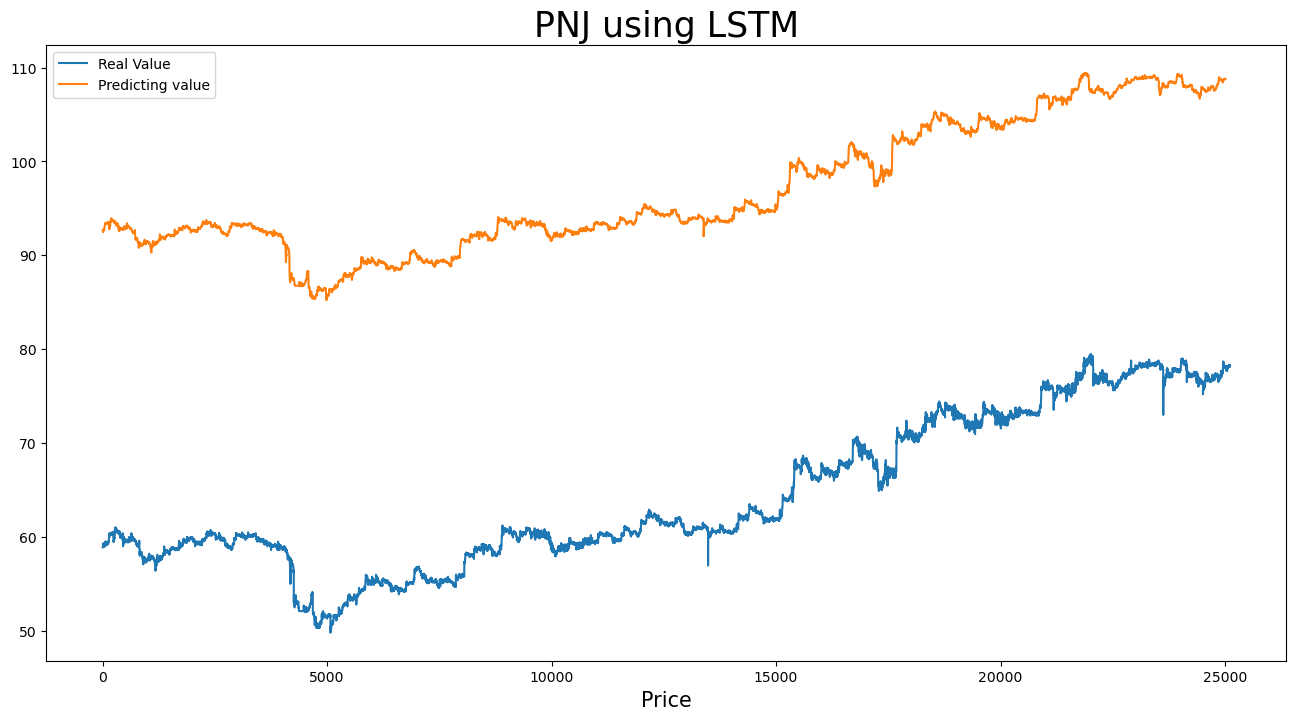

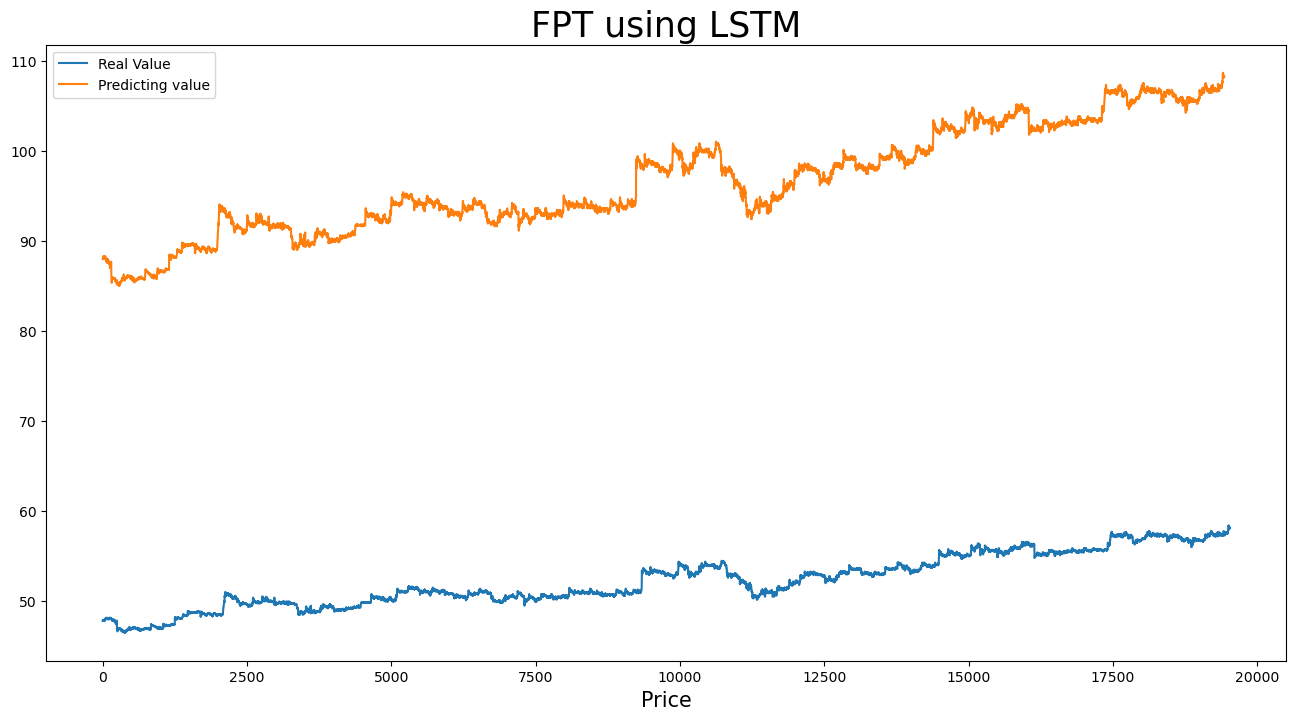

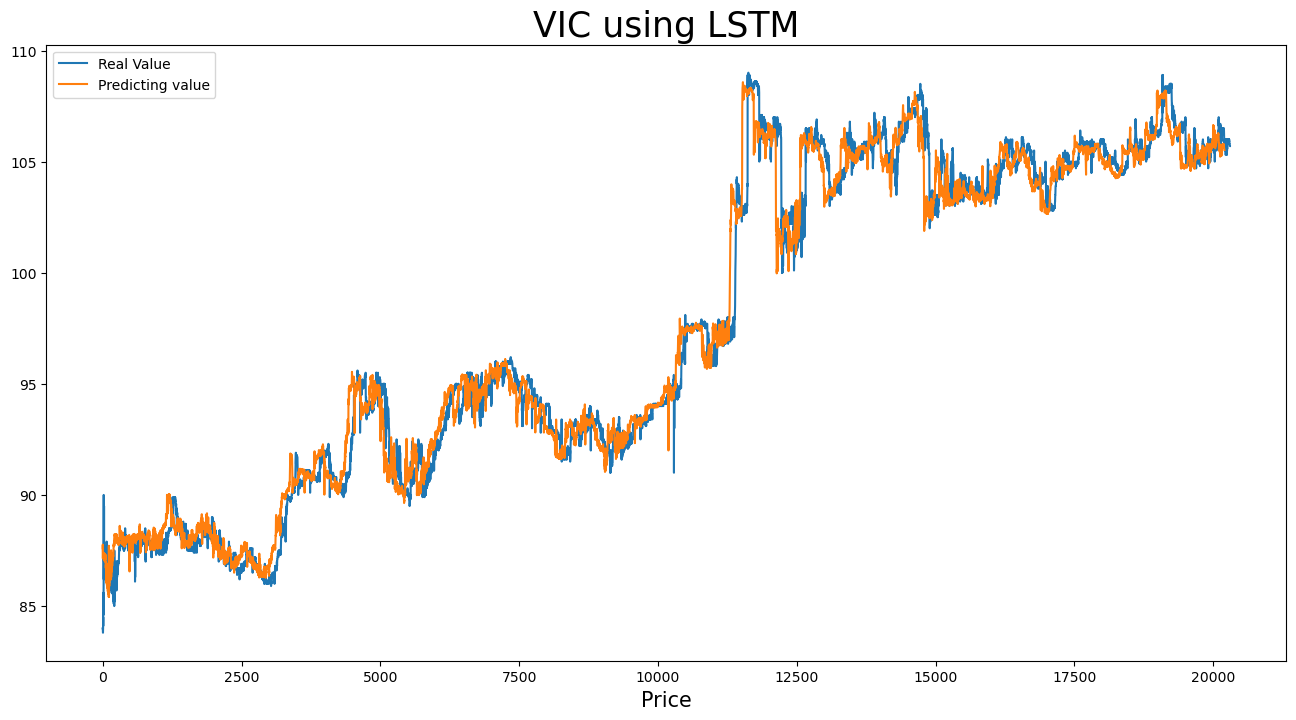

In [88]:
for var in variables:
    plt.figure(figsize = (16,8))
    y_test_no_scaled =  globals()[var + '_y_test_no_scaled']
    y_LSTM_original = globals()[var + "_y_LSTM_original"].reshape(-1)
    plt.plot(np.arange(len(y_test_no_scaled)), y_test_no_scaled, label = "Real Value")
    plt.plot(np.arange(len(y_LSTM_original)), y_LSTM_original, label = "Predicting value")
    plt.title(f"{var} using LSTM", fontsize = 25)
    plt.xlabel("Time", fontsize = 15)
    plt.xlabel("Price", fontsize = 15)    
    plt.legend()
    plt.show()    

**Some comments for the visualization above**

Firstly, I found that predicting prices using RNN and LSTM is not much different. RNN seems to fluctuate less than LSTM, specifically as we see the RNN model's FPT stock price as a straight line, while the LSTM model's FPT shows more clearly between values.

Secondly, it can be seen that, except for VIC, the stock price predictions of MSN, PNJ, and FPT are very far from the actual value. The reason is because when looking at the original real value, in the first period of time when we take those values as a train test, the price is very high, but until we take them as a test set, at that time the price is ancient. Its votes dropped again. For RNN and LSTM, it can only learn from training, so when predicting, its value is very large, but in terms of volatility, it seems to fluctuate compared to the real value very well.

Evaluating the model by

- Mean absolute error (MAE): It is measured as the average absolute difference between the predicted values and the actual values $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y_i}|$

- Mean absolute percentage error (MAPE): $MAPE = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|$

- Root Mean Square Error (RMSE): $RMSE = \sqrt{\sum_{i=1}^n \frac{(y_i - \hat{y}_i)^2}{n}}$

Therefore, **smaller values of MAE and RMSE indicate better predictive accuracy, while for MAPE, lower values indicate higher accuracy**.


In [134]:
for var in variables:
    globals()[var + "_RNN_MAE"] = mean_absolute_error(globals()[var + "_y_RNN_original"], globals()[var + '_y_test_no_scaled'])
    globals()[var + "_RNN_MAPE"] = mean_absolute_percentage_error(globals()[var + "_y_RNN_original"], globals()[var + '_y_test_no_scaled'])
    globals()[var + "_RNN_RMSE"] = np.sqrt(mean_squared_error(globals()[var + "_y_RNN_original"], globals()[var + '_y_test_no_scaled']))
    
    print(f"{var} MAE RNN: {globals()[var + '_RNN_MAE']}")
    print(f"{var} MAPE RNN: {globals()[var + '_RNN_MAPE']}")
    print(f"{var} RMSE RNN: {globals()[var + '_RNN_RMSE']}")
    print()    

MSN MAE RNN: 27.364002159146885
MSN MAPE RNN: 0.3004784020540596
MSN RMSE RNN: 28.287533332972522

PNJ MAE RNN: 32.365235906723505
PNJ MAPE RNN: 0.3372531593259546
PNJ RMSE RNN: 32.406565203032194

FPT MAE RNN: 50.4025903786298
FPT MAPE RNN: 0.49082883219873713
FPT RMSE RNN: 50.48578807415232

VIC MAE RNN: 0.2121116063798153
VIC MAPE RNN: 0.0021885913769145206
VIC RMSE RNN: 0.31785992937334867



In [135]:
for var in variables:
    globals()[var + "_LSTM_MAE"] = mean_absolute_error(globals()[var + "_y_LSTM_original"],globals()[var + '_y_test_no_scaled'])
    globals()[var + "_LSTM_MAPE"] = mean_absolute_percentage_error(globals()[var + "_y_LSTM_original"], globals()[var + '_y_test_no_scaled'])
    globals()[var + "_LSTM_RMSE"] = np.sqrt(mean_squared_error(globals()[var + "_y_LSTM_original"], globals()[var + '_y_test_no_scaled']))
    
    print(f"{var} MAE LSTM: {globals()[var + '_LSTM_MAE']}")
    print(f"{var} MAPE LSTM: {globals()[var + '_LSTM_MAPE']}")
    print(f"{var} RMSE LSTM: {globals()[var + '_LSTM_RMSE']}")
    print()   

MSN MAE LSTM: 27.425753747450162
MSN MAPE LSTM: 0.3008336224272472
MSN RMSE LSTM: 28.405261343033846

PNJ MAE LSTM: 32.576051653044146
PNJ MAPE LSTM: 0.33867512013550616
PNJ RMSE LSTM: 32.59858231841276

FPT MAE LSTM: 44.34078030504033
FPT MAPE LSTM: 0.45873729376394407
FPT RMSE LSTM: 44.43558117563432

VIC MAE LSTM: 0.1852298392356402
VIC MAPE LSTM: 0.0018983814440820801
VIC RMSE LSTM: 0.2538026936560509



**Some comments for metrics of evaluating model**

Firstly, I think these are all acceptable evaluation numbers at the margin of error. VIC stock for both models is the best, that's because the stock price is always at the same level for the whole time series and there is no obvious increase or decrease.

Secondly, between the two models I use, RNN and LSTM, the results seem to be the same and there is not much difference. So in this case, using RNN and LSTM are the same.

## Final Step: Answer the problem 

I want to answer the question you asked just to predict future price fluctuations. Therefore, I converted the predicted future price into price fluctuations.

In [125]:
for var in variables:
    globals()[var + "_y_test_series"] = pd.Series(globals()[var + '_y_test_no_scaled'].flatten())
    globals()[var + "_y_RNN_series"] = pd.Series(globals()[var + "_y_RNN_original"].flatten())
    globals()[var + "_y_LSTM_series"] = pd.Series(globals()[var + "_y_LSTM_original"].flatten())
    
    globals()[var + "_price_fluctuations"] = globals()[var + "_y_test_series"].diff().dropna()
    globals()[var + "_RNN_fluctuations"] = globals()[var + "_y_RNN_series"].diff().dropna()
    globals()[var + "_LSTM_fluctuations"] = globals()[var + "_y_LSTM_series"].diff().dropna()

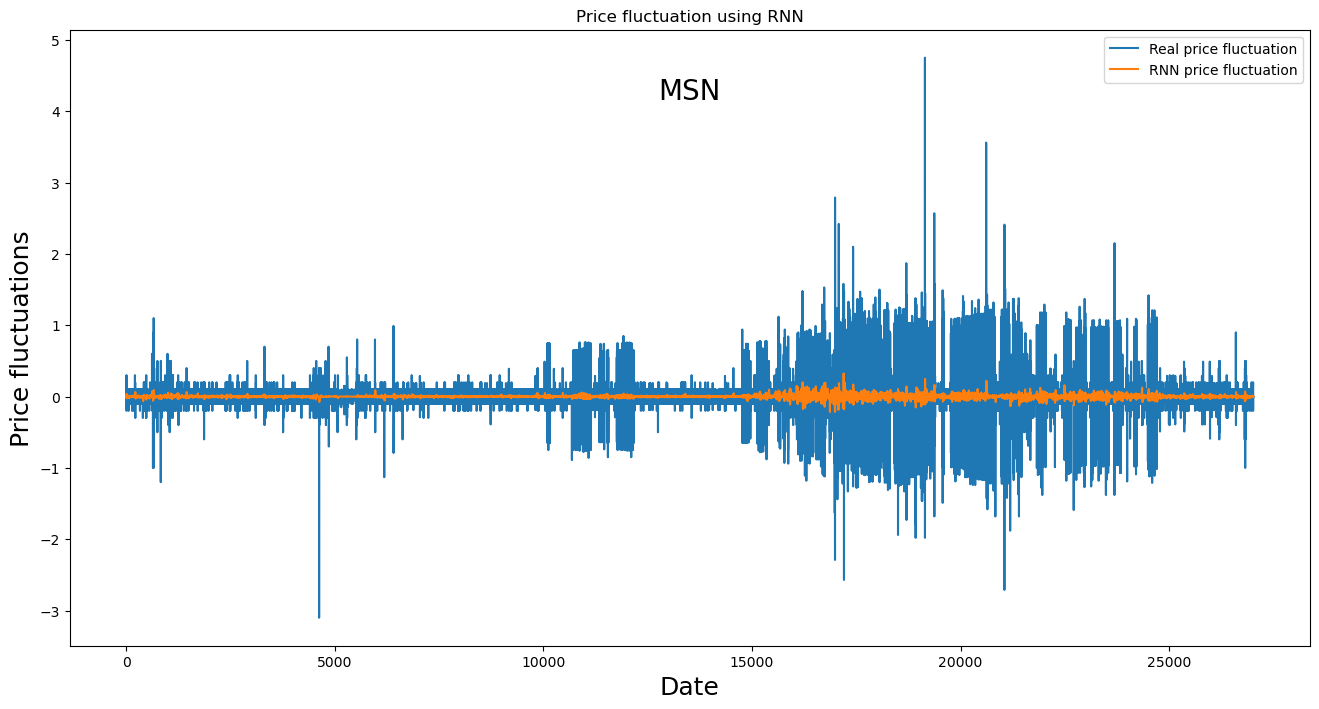

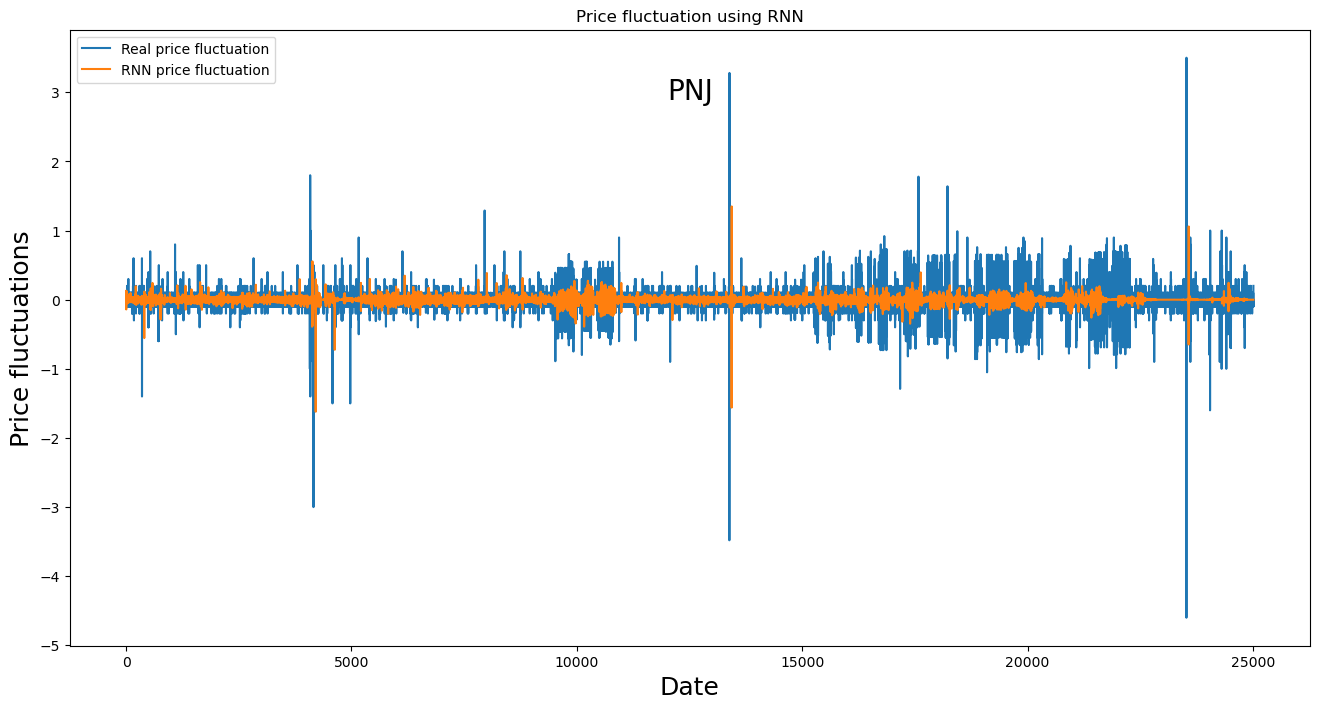

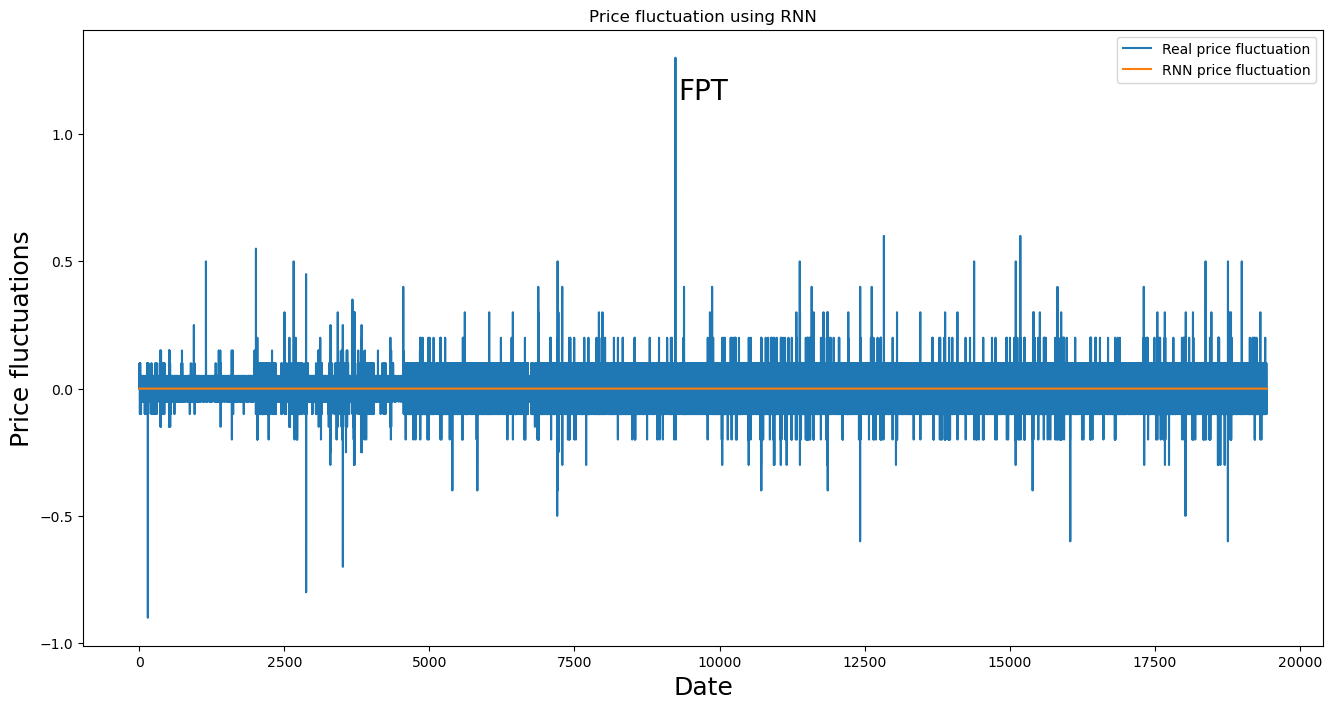

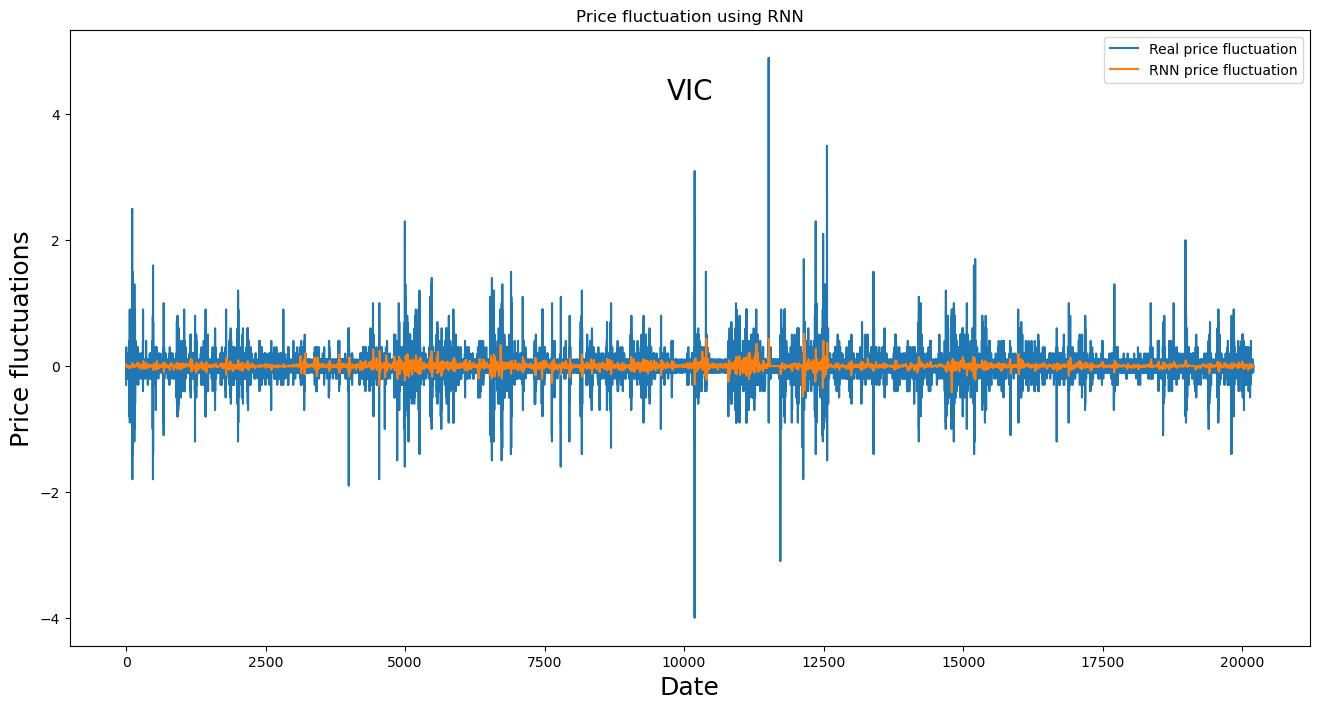

In [130]:
for var in variables:
    # Visualize the price fluctuations
    plt.figure(figsize=(16, 8))
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price fluctuations", fontsize=18)
    plt.plot(globals()[var + "_price_fluctuations"], label = "Real price fluctuation")
    plt.plot(globals()[var + "_RNN_fluctuations"], label = "RNN price fluctuation")
    plt.legend()
    plt.title("Price fluctuation using RNN")
    # Add text annotation with variable name
    plt.text(0.5, 0.9, var, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize = 20)    
    plt.show()

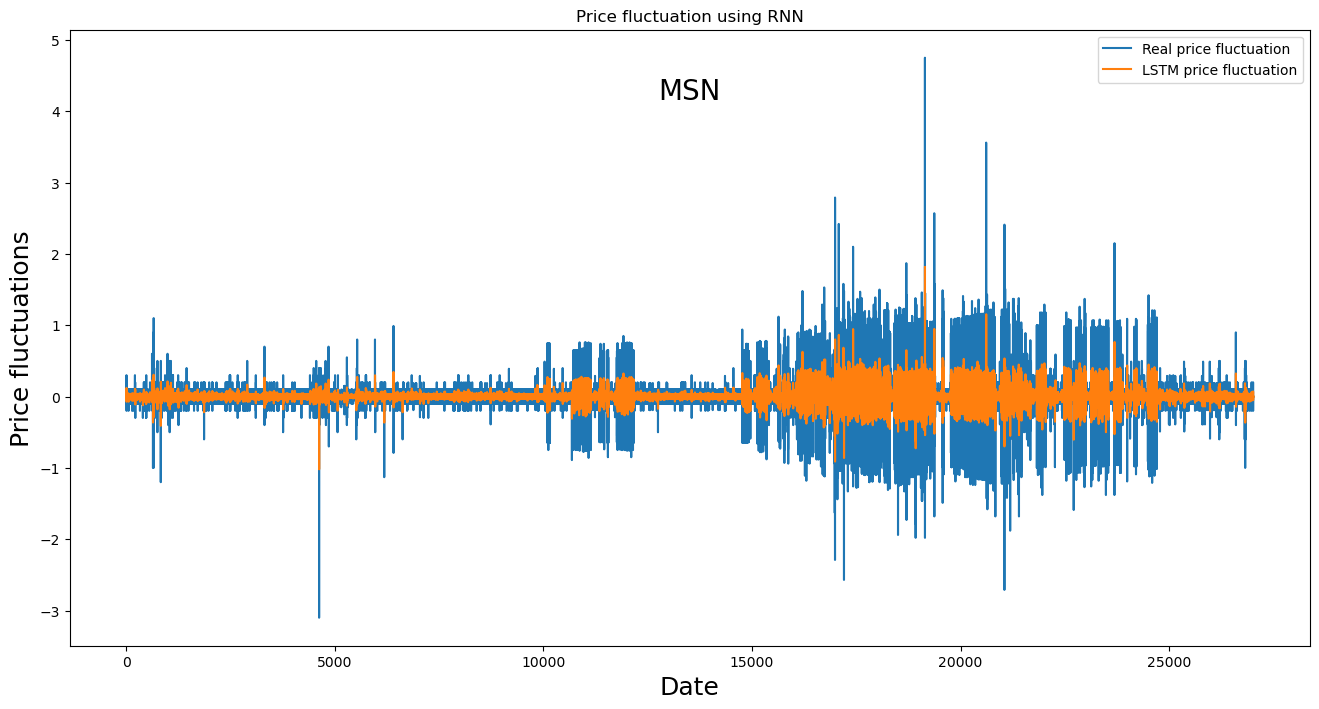

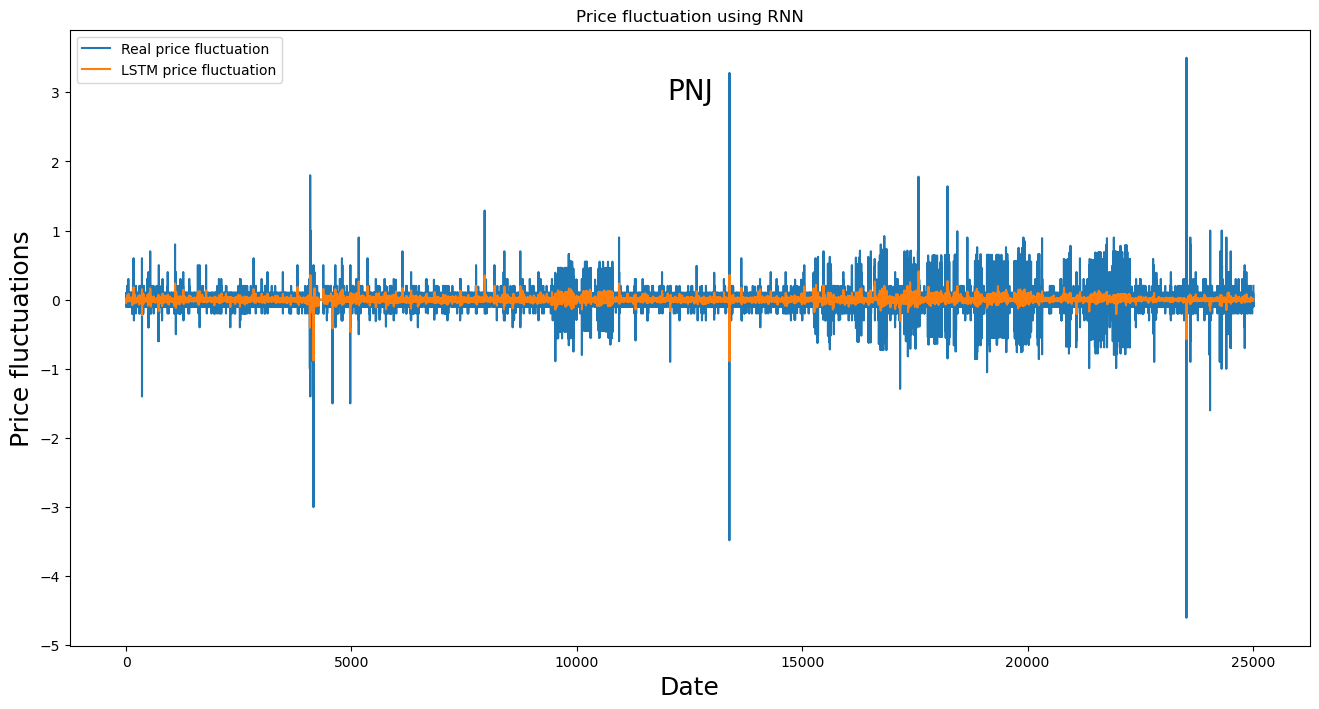

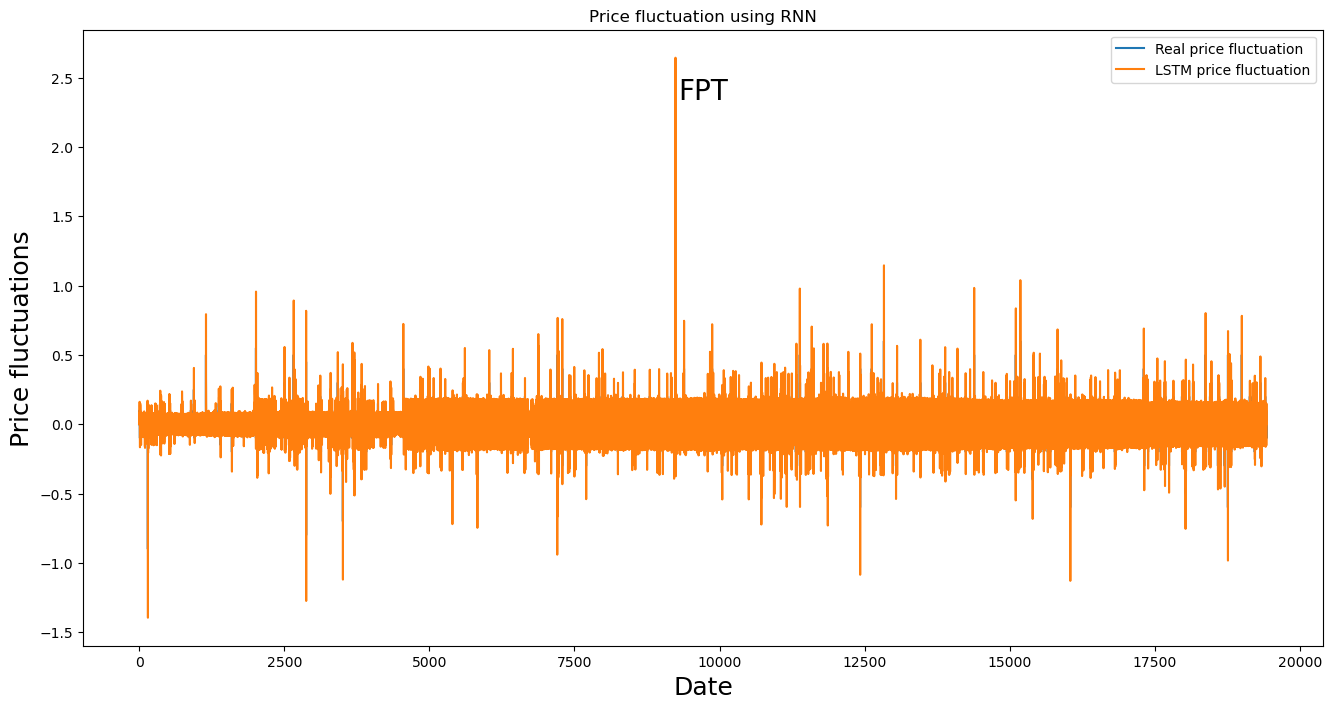

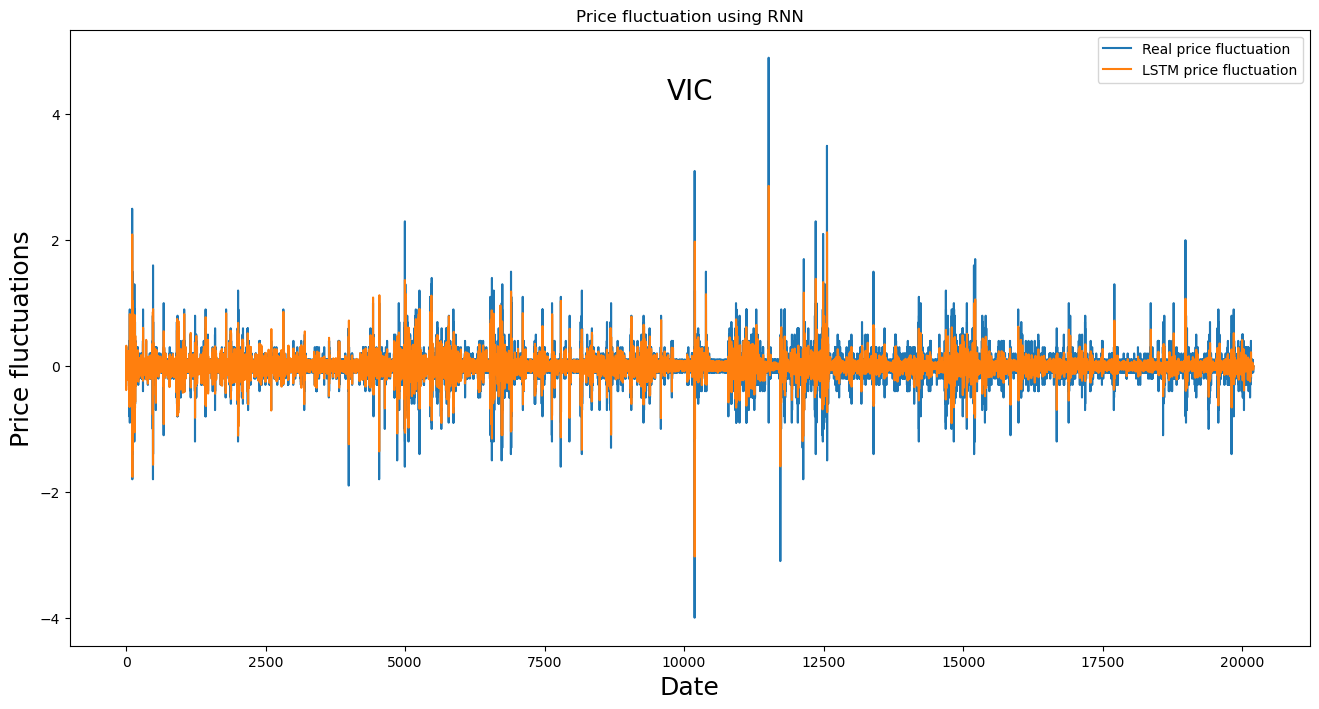

In [131]:
for var in variables:
    # Visualize the price fluctuations
    plt.figure(figsize=(16, 8))
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price fluctuations", fontsize=18)
    plt.plot(globals()[var + "_price_fluctuations"], label = "Real price fluctuation")
    plt.plot(globals()[var + "_LSTM_fluctuations"], label = "LSTM price fluctuation")
    plt.legend()
    plt.title("Price fluctuation using RNN")
    # Add text annotation with variable name
    plt.text(0.5, 0.9, var, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize = 20)    
    plt.show()

**Some comments for the visualization above:**

Using the model gives us less fluctuation than its real value, which is also very reasonable. But in general, I see that the model predicting price volatility also matches the actual price volatility quite well.